<a href="https://colab.research.google.com/github/frh02/CAN_Research/blob/main/EMD_CAN_bus_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using EMD method for cleaning the CAN bus data 

In [ ]:
!pip install emd

     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 2.8MB 26.1MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 


In [ ]:
import pandas as pd
import csv
from ast import literal_eval 
import numpy as np
import array as array
import pandas as pd
import emd 
import matplotlib.pyplot as plt 
from scipy.fft import fft, fftfreq

In [ ]:
df1 = pd.read_fwf('/content/Attack_free_dataset_small.txt')
df1["Target"] = 0
df1.rename(columns={'Id': 'ID'})
print(df1)
df1.to_csv('Attack_free_dataset_small.csv')
#df2 = pd.read_fwf('/content/DoS_attack_small.txt')
#print(df2)
#df2.to_csv('DoS_attack_small.csv')
#df2["Target"] = 0
#print()
#frames= [df1,df2]
#result = pd.concat(frames)
#result.to_csv('input_train.csv')
#attack_df = pd.read_csv("/content/input.csv")
#attack_df = pd.read_csv("Dos_small_attack.csv")
#df_new = pd.read_csv("/content/Dos_small_attack.csv", converters={"Value": lambda x: int(x, 16)})
#df_new = pd.read_csv("/content/input.csv", converters={"Value": lambda x: int(x, 16)})

            Time   seconds   ID Value  App  ...   D5   D6   D7   D8 Target
0     Timestamp:  0.000000  ID:  0316    0  ...   20   1a   00   7f      0
1     Timestamp:  0.000224  ID:  0329    0  ...   11   2f   00   10      0
2     Timestamp:  0.000462  ID:  0080    0  ...   20   1a   20   43      0
3     Timestamp:  0.000704  ID:  0081    0  ...   00   00   00   53      0
4     Timestamp:  0.000878  ID:  0120    0  ...  NaN  NaN  NaN  NaN      0
...          ...       ...  ...   ...  ...  ...  ...  ...  ...  ...    ...
1495  Timestamp:  0.652247  ID:  0440    0  ...   ff   90   09   00      0
1496  Timestamp:  0.652501  ID:  04b0    0  ...   00   00   00   00      0
1497  Timestamp:  0.652747  ID:  0164    0  ...   00   00   02   0a      0
1498  Timestamp:  0.652982  ID:  0545    0  ...   3b   00   3b   00      0
1499  Timestamp:  0.653326  ID:  0153  100  ...  NaN  NaN  NaN  NaN      0

[1500 rows x 16 columns]


In [ ]:
x=df1.Value.apply(lambda x: int(str(x),16))

x_ar = x.to_numpy()
print(df1)
df1.to_csv('input_new.csv')


            Time   seconds   ID Value  App  ...   D5   D6   D7   D8 Target
0     Timestamp:  0.000000  ID:  0316    0  ...   20   1a   00   7f      0
1     Timestamp:  0.000224  ID:  0329    0  ...   11   2f   00   10      0
2     Timestamp:  0.000462  ID:  0080    0  ...   20   1a   20   43      0
3     Timestamp:  0.000704  ID:  0081    0  ...   00   00   00   53      0
4     Timestamp:  0.000878  ID:  0120    0  ...  NaN  NaN  NaN  NaN      0
...          ...       ...  ...   ...  ...  ...  ...  ...  ...  ...    ...
1495  Timestamp:  0.652247  ID:  0440    0  ...   ff   90   09   00      0
1496  Timestamp:  0.652501  ID:  04b0    0  ...   00   00   00   00      0
1497  Timestamp:  0.652747  ID:  0164    0  ...   00   00   02   0a      0
1498  Timestamp:  0.652982  ID:  0545    0  ...   3b   00   3b   00      0
1499  Timestamp:  0.653326  ID:  0153  100  ...  NaN  NaN  NaN  NaN      0

[1500 rows x 16 columns]


(0.0, 0.2)

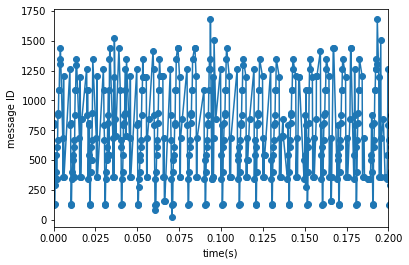

In [ ]:
DURATION = df1['seconds']
plt.plot(DURATION,x)
plt.scatter(DURATION,x)
plt.xlabel("time(s)")
plt.ylabel("message ID")
plt.xlim(0.0,0.2)

(0.0, 0.006)

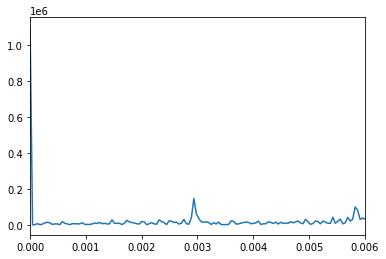

In [ ]:
DURATION = df1['seconds']
N=1500;
fs=100;
T=N/fs;
Y=abs(fft(x_ar,N));
freq=np.linspace(0,1/T,N);
plt.plot(freq,abs(Y))
plt.xlim([0.00, 0.006])


In [ ]:
import numpy as np
import scipy as sp

def emd(x, nIMF = 3, stoplim = .001):
    """Perform empirical mode decomposition to extract 'niMF' components out of the signal 'x'."""
    
    r = x
    t = np.arange(len(r))
    imfs = np.zeros(nIMF,dtype=object)
    for i in range(nIMF):
        r_t = r
        is_imf = False
        
        while is_imf == False:
            # Identify peaks and troughs
            pks = sp.signal.argrelmax(r_t)[0]
            trs = sp.signal.argrelmin(r_t)[0]
            
            # Interpolate extrema
            pks_r = r_t[pks]
            fip = sp.interpolate.InterpolatedUnivariateSpline(pks,pks_r,k=3)
            pks_t = fip(t)
            
            trs_r = r_t[trs]
            fitr = sp.interpolate.InterpolatedUnivariateSpline(trs,trs_r,k=3)
            trs_t = fitr(t)
            
            # Calculate mean
            mean_t = (pks_t + trs_t) / 2
            mean_t = _emd_complim(mean_t, pks, trs)
            
            # Assess if this is an IMF (only look in time between peaks and troughs)
            sdk = _emd_comperror(r_t, mean_t, pks, trs)
            
            # if not imf, update r_t and is_imf
            if sdk < stoplim:
                is_imf = True
            else:
                r_t = r_t - mean_t
                
        
        imfs[i] = r_t
        r = r - imfs[i] 
        
    return imfs


def _emd_comperror(h, mean, pks, trs):
    """Calculate the normalized error of the current component"""
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    return np.sum(np.abs(mean[samp_start:samp_end]**2)) / np.sum(np.abs(h[samp_start:samp_end]**2))


def _emd_complim(mean_t, pks, trs):
    """Discard the mean extrema envelope past the first and last extrema"""
    samp_start = np.max((np.min(pks),np.min(trs)))
    samp_end = np.min((np.max(pks),np.max(trs))) + 1
    mean_t[:samp_start] = mean_t[samp_start]
    mean_t[samp_end:] = mean_t[samp_end]
    return mean_t

In [ ]:
minN = 100
maxN = 1500
#x = np.load('/content/exampledata.npy')
x_ser=df1.Value.apply(lambda x: int(str(x),16))
x = x_ser.to_numpy()
x = x[minN:maxN+1]
t = np.arange(0,len(x)*.001,.001)

In [ ]:
imfs = emd(x, nIMF = 3)
#print(len(imfs[4]))

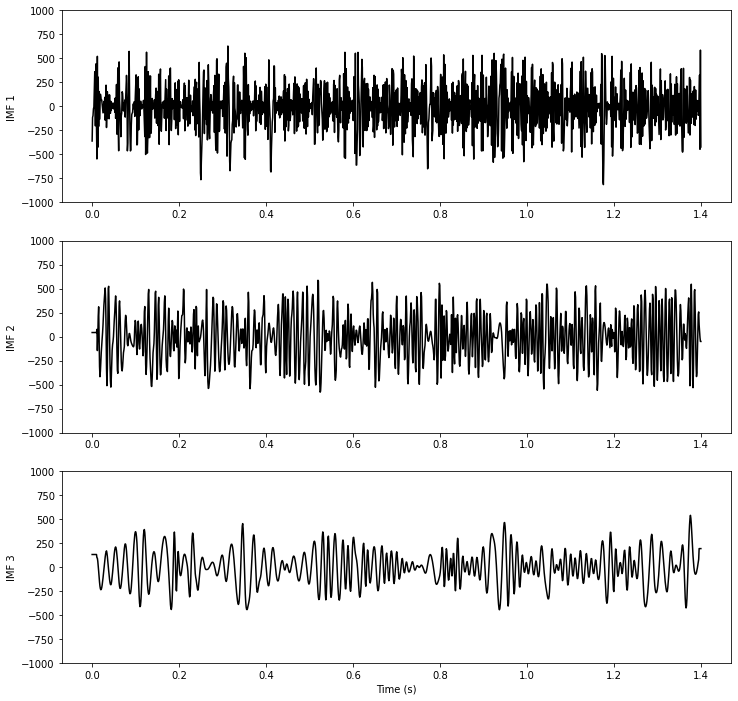

In [ ]:
plt.figure(figsize=(12,12))
for i in range(len(imfs)):
    plt.subplot(len(imfs),1,i+1)
    #plt.plot(t,x,color='0.6')
    plt.plot(t,imfs[i],'k')
    plt.ylim([-1000,1000])
    plt.ylabel('IMF '+np.str(i+1))
    if i == len(imfs)-1:
        plt.xlabel('Time (s)')